In [ ]:
from ahrs import Sensors
import pandas as pd
import numpy as np

In [27]:
# CONSTANTS
FS = 104.0  # Sampling frequency in Hz
FS_SEC = 1.0 / FS  # Sampling period in seconds
FS_MSEC = FS_SEC * 1000.0  # Sampling period in milliseconds

DEG_TO_RAD = np.pi / 180.0  # Degrees to radians conversion factor
RAD_TO_DEG = 180.0 / np.pi  # Radians to degrees conversion factor
G_TO_MS2 = 9.80665  # Gravity to m/s^2 conversion factor
MG_TO_MS2 = G_TO_MS2 / 1000.0  # Milli-gravity to m/s^2 conversion factor


In [30]:
sensors = pd.read_csv('data/imu1.csv')
sensors.head()

SAMPLE_LEN = len(sensors)
print(f"Sample length: {SAMPLE_LEN}")

Sample length: 8


In [23]:
import matplotlib.pyplot as plt

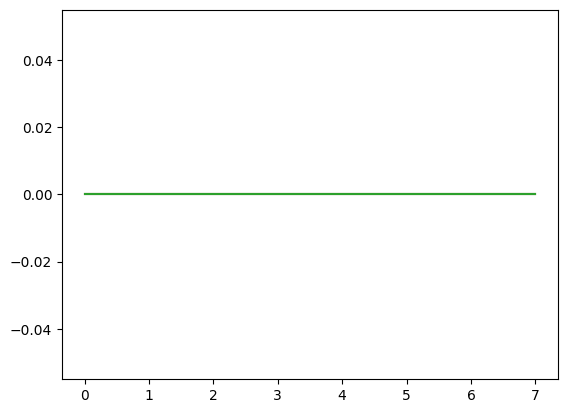

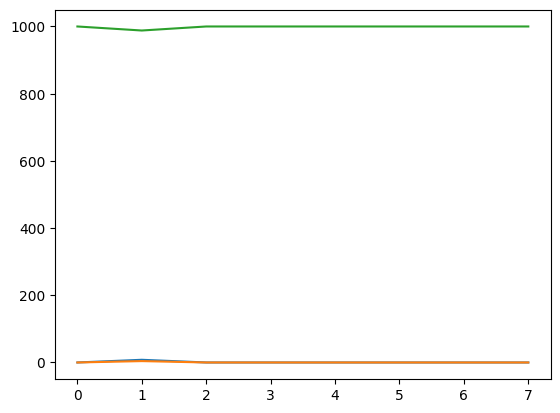

In [28]:
gyro_mdps = sensors[['gyro_x_mdps', 'gyro_y_mdps', 'gyro_z_mdps']] # m deg/s
# Convert to rad/s
gyro = gyro_mdps.to_numpy() * (DEG_TO_RAD * 1000.0)
accel_mg = sensors[['accel_x_mg', 'accel_y_mg', 'accel_z_mg']] # mg
# convert to m/s^2
accel = accel_mg.to_numpy() * MG_TO_MS2

plt.plot(gyro_mdps)
plt.show()
plt.plot(accel_mg)
plt.show()

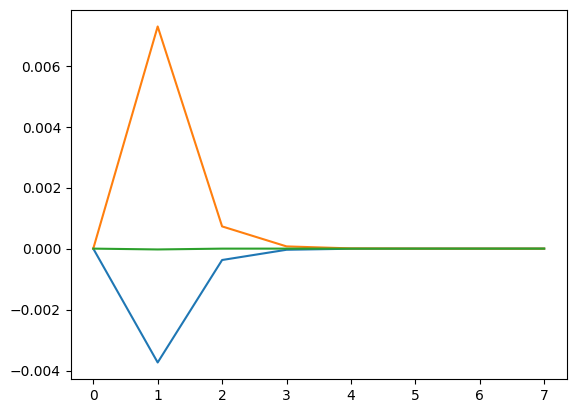

In [33]:
# Complimentary filter
from ahrs.filters import Complementary as CF
from ahrs.common.orientation import q2euler
from ahrs.common import Quaternion
import numpy as np

cf = CF(acc=accel,gyr=gyro, frequency=104.0, gain=0.1)
Q = np.zeros((SAMPLE_LEN, 4))
euler = np.zeros((SAMPLE_LEN, 3))

for idx,q in enumerate(cf.Q):
    euler[idx] = q2euler(q)

plt.plot(euler)
plt.show()

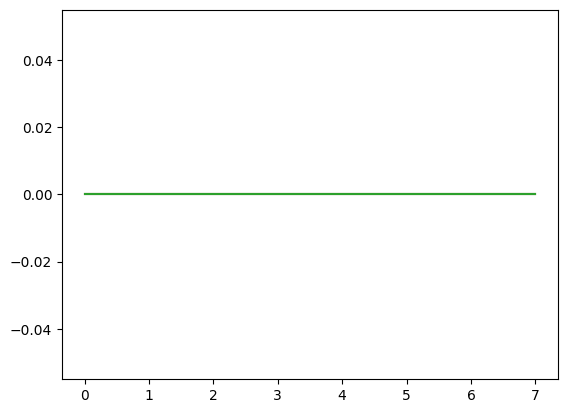

In [34]:
from ahrs.filters import Madgwick
madgwick = Madgwick()
Q = np.tile([1., 0., 0., 0.], (SAMPLE_LEN, 1)) # Allocate for quaternions
for t in range(1, SAMPLE_LEN):
    Q[t] = madgwick.updateIMU(Q[t-1], gyr=gyro[t], acc=accel[t])
    euler[t] = q2euler(Q[t])

plt.plot(euler)
plt.show()




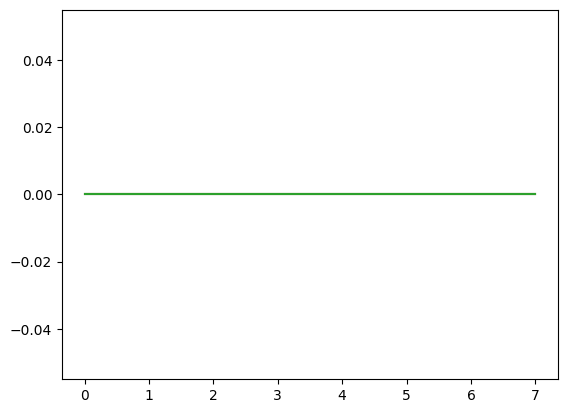

In [36]:
from ahrs.filters import Mahony

mahony = Mahony()
Q = np.tile([1., 0., 0., 0.], (SAMPLE_LEN, 1)) 

for t in range(1, SAMPLE_LEN):
    Q[t] = mahony.updateIMU(Q[t-1], gyr=gyro[t], acc=accel[t])
    euler[t] = q2euler(Q[t])

plt.plot(euler)
plt.show()


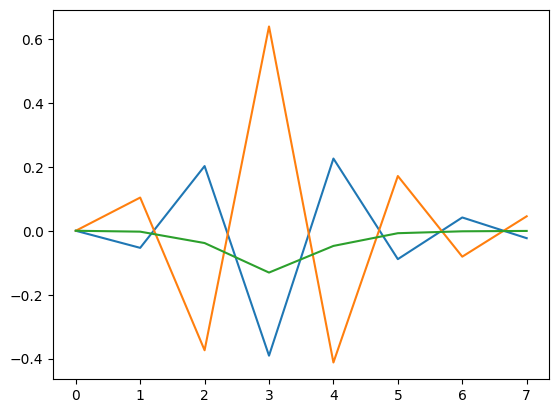

In [37]:
from ahrs.filters import UKF
ukf = UKF()
Q = np.tile([1., 0., 0., 0.], (SAMPLE_LEN, 1)) 

for t in range(1, SAMPLE_LEN):
    Q[t] = ukf.update(Q[t-1], gyr=gyro[t], acc=accel[t])
    euler[t] = q2euler(Q[t])

plt.plot(euler)
plt.show()
